<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module2/GMM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
from IPython.display import Image
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


#Gaussian Mixture Models: Implementation


Rewrite log-likelihood for Gaussian mixture:

\begin{align}
\log \ell(\theta) = \sum_{i=1}^N\log p(\mathbf{x}^{(i)}|\theta)=\sum_{i=1}^N\log\sum_{z^{(i)}=1}^K p(\mathbf{x}^{(i)}, z^{(i)}|\theta)
\end{align}

where $\mathbf{x}$ are observed dataset and $z$ are the cluster membership which are hidden variables. Unfortunately, it is very hard to optimize.

## Expectation-Maximization(EM) algorithm

### Background
The basic idea behind EM algorithm is alternate between estimating the hidden variables during the **E step** (expectation step), and then using the fully observed data to compute the MLE during the **M step** (maximization step). Of course we need to iterate this process since the expected values depend on the parameters, but the parameters depend on the expected values.


- Consider a set of arbitary distribution $q(z^{(i)})$ over each hidden variable $z^{(i)}$. The observed data log likelihood can written as follows:
$$ \log \ell(\theta)=\sum_{i=1}^N\log\left(\sum_{c=1}^K q(z^{(i)}=c) \frac{p(\mathbf{x}^{(i)}, z^{(i)}=c|\theta)}{q(z^{(i)}=c)}\right) $$

- Using Jensen's inequality, $\phi(\sum_i a_ix_i)\ge  \sum_i a_i \phi(x_i)$ for any concave function $\phi$ and $\sum_i a_i=1$.
\begin{align}
\log \ell(\theta)&\ge \sum_{i=1}^N \sum_{c=1}^K q(z^{(i)}=c) \log\left( \frac{p(\mathbf{x}^{(i)}, z^{(i)}=c|\theta)}{q(z^{(i)}=c)}\right) \\
&\triangleq \sum_{i=1}^N \mathcal{E}[\theta,z^{(i)}|\mathbf{x}^{(i)}] = \mathcal{E}[\theta, \{z^{(i)}\}_{i=1}^N |\{\mathbf{x}^{(i)}\}_{i=1}^N ]
\end{align}
 $\mathcal{E}[\theta, \{z^{(i)}\}_{i=1}^N |\{\mathbf{x}^{(i)}\}_{i=1}^N ]$ is called the **evidence lower bound**, since it is a lower bound on the log marginal likelihood $\log p(\{\mathbf{x}^{(i)}\}_{i=1}^N|\theta)$



We see that the lower bound is a sum of $N$ terms, each of which has the following form
\begin{align}
\mathcal{E}[\theta,z^{(i)}|\mathbf{x}^{(i)}] &= \sum_{c=1}^K q(z^{(i)}=c) \log\left( \frac{p(\mathbf{x}^{(i)}, z^{(i)}=c|\theta)}{q(z^{(i)}=c)}\right) \\
&=\sum_{c=1}^K q(z^{(i)}=c) \log\left( \frac{p(z^{(i)}=c| \mathbf{x}^{(i)},\theta)p(\mathbf{x}^{(i)}|\theta)}{q(z^{(i)}=c)}\right)\\
&= \sum_{c=1}^K q(z^{(i)}=c) \log\left( \frac{p(z^{(i)}=c| \mathbf{x}^{(i)},\theta)}{q(z^{(i)}=c)}\right) + \sum_{c=1}^K q(z^{(i)}=c)  \log p(\mathbf{x}^{(i)}|\theta) \\
&=-\text{KL}(q(z^{(i)})||p(z^{(i)}| \mathbf{x}^{(i)},\theta)) + \log p(\mathbf{x}^{(i)}|\theta)
\end{align}
where $\text{KL}(q||p)=\sum_z q(z)\log(\frac{q(z)}{p(z)})$ is the Kullback-Leibler divergence (or KL divergence for short)
between probability distributions $q$ and $p$.

- The key
property we need here is that $\text{KL}(q||p)\ge 0 $ and $\text{KL}(q||p)=0$ iff $q=p$.

- we can maximize the
lower bound $\mathcal{E}[\theta, \{z^{(i)}\}_{i=1}^N |\{\mathbf{x}^{(i)}\}_{i=1}^N ]$ with respect to $\{z^{(i)}\}$ by setting each one to $q^*(z^{(i)})=p(z^{(i)}| \mathbf{x}^{(i)},\theta)$.

 This ensures the ELBO is a **tight lower bound**
$$ \mathcal{E}[\theta, \{z^{(i)}\}_{i=1}^N |\{\mathbf{x}^{(i)}\}_{i=1}^N ]=\sum_{i=1}^N\log p(\mathbf{x}^{(i)}|\theta)=\log \ell(\theta)$$





### Construct the EM algorithm
At each the $t$-iteration with $\theta^t$, EM algorithm constructs an **auxiliary function**,
$$ \boxed{q(\color{blue}{\theta}; \color{red}{\theta^t}) = \sum_{i=1}^N \sum_{c=1}^K \underbrace{p(z^{(i)}=c|\mathbf{x}^{(i)},\color{red}{\theta^t})}_{q(z^{(i)})}\log \frac{p(\mathbf{x}^{(i)},z^{(i)}=c|\color{blue}{\theta})}{p(z^{(i)}=c|\mathbf{x}^{(i)},\color{red}{\theta^t})}}$$
which is a lower envelope of $\log \ell(\theta)$, i.e,
$$\log \ell(\theta) \ge q(\color{blue}{\theta}; \color{red}{\theta^t}), \forall \theta $$
with the equality holds at $\theta^t=\theta$.

- The EM algorithm iterates for $t=0,1,\dots$ to update $\theta$:
$$\color{red}{\theta_{t+1}} = \arg\max_{\theta}q(\color{blue}{\theta}; \color{red}{\theta^t}) $$

- EM algorithm is ascent for maximization:
$$ \log \ell(\theta^{t+1})\ge q(\theta^{t+1}; \theta^t)\ge q(\theta^{t};\theta^t)=\log \ell(\theta^t)$$

- In general, global maximum is not guaranteed because the problem is
non-convex


In [ ]:
display(Image(url='https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/EM.png?raw=true', width=600))

## EM algorithm in GMM
### E(xpecation) step
Evaluate the probability $p(z^{(i)}| \mathbf{x}^{(i)},\theta^t)$ using the current parameters $\theta^t =\{\pi_c^t, \mu_c^t, \Sigma_c^t\}_{c=1}^K$:

 \begin{align}
 \phi_c^{(i), t}\triangleq p(z^{(i)}=c| \mathbf{x}^{(i)},\color{red}{\theta^t}) &= \frac{p( \mathbf{x}^{(i)}|z^{(i)}=c, \theta^t)p(z^{(i)}=c| \color{red}{\theta^t})}{p(\mathbf{x}^{(i)}|\color{red}{\theta^t})}  \qquad \text{By Bayes rule} \\
&= \frac{\pi_c^t p(\mathbf{x}^{(i)} | \mu_c^t, \Sigma_c^t)}{\sum_{j=1}^K \pi_j^t p(\mathbf{x}^{(i)} | \mu_j^t, \Sigma_j^t) }, \qquad \forall 1\le i\le N, 1\le c\le K.
 \end{align}
 Where
 $$ p(\mathbf{x}^{(i)} | \mu_c^t, \Sigma_c^t) = \frac{1}{\sqrt{(2\pi)^d|\Sigma_c|}}\exp\left(-\frac{1}{2}(\mathbf{x}^{(i)}-\mu_c)^\top \Sigma_c^{-1}(\mathbf{x}^{(i)}-\mu_c)\right), \qquad 1\le c\le K$$
 is the PDF for the $c$-th Gaussian distribution of the mixture.

 **E step gives the clustering:**

 - $\phi_c^{(i)}= p(z^{(i)}=c| \mathbf{x}^{(i)},\theta)$ is the posterior probability: the probability that observation $\mathbf{x}^{(i)}$ comes from the cluster $c$, given the model parameter $\theta$.

 - $(\phi_1^{(i)}, \phi_2^{(i)}, \dots, \phi_K^{(i)})$ is the probability prediction for $\mathbf{x}^{(i)}$ belonging to each cluster.

 - Having learned model parameters of Gaussian mixture, we cluster $\mathbf{x}^{(i)}$ by checking the highest posterior probability
$$ z^{(i)} = \text{arg}\max_{1\le c\le K} \phi_c^{(i)}.$$
This is similar to the prediction step of logistic regression.

### M(aximization) step

Update parameters by solving

$$\color{red}{\theta^{t+1}}=\arg\max_{\theta} q(\color{blue}\theta, \color{red}{\theta^{t}}) = \arg\max_{\theta}\sum_{i=1}^N \sum_{c=1}^K \phi_{c}^{(i),t} \log \frac{p(\mathbf{x}^{(i)}, z^{(i)}=c|\color{blue}{\theta})}{\phi_{c}^{(i),t} }$$

using the computed posterior probabilities $\phi_{c}^{(i),t}$ from E step.

We can switch the order of sum and find out we only need to maximize for each individual $c$.

Equvilently,
\begin{align}
\pi_c^{t+1}, \mu_c^{t+1}, \Sigma_c^{t+1} &= \arg\max_{\pi_c, \mu_c, \Sigma_c}\sum_{i=1}^N \phi_{c}^{(i),t} \log p(\mathbf{x}^{(i)}, z^{(i)}=c|\{\pi_c, \mu_c, \Sigma_c\})\\
&= \arg\max_{\pi_c, \mu_c, \Sigma_c} \sum_{i=1}^N  \phi_{c}^{(i),t} \log\left[ \pi_c p(\mathbf{x}^{(i)} |\mu_c, \Sigma_c)\right] \\
& = \arg\max_{ \mu_c, \Sigma_c} \sum_{i=1}^N \phi_{c}^{(i),t} \log p(\mathbf{x}^{(i)} |\mu_c, \Sigma_c) + \arg\max_{ \pi_c} \sum_{i=1}^N \phi_{c}^{(i),t} \log \pi_c
\end{align}

note that we have constraints $\pi_c\ge 0$ and $\sum_{c=1}^K \pi_c =1$.

This optimization has analytical solution! Do it yourself.

\begin{align}
& \pi_c^{t+1}=\frac{\sum_{i=1}^N \phi_{c}^{(i),t}}{\sum_{c=1}^K\sum_{i=1}^N \phi_{c}^{(i),t}}=\frac{1}{N}\sum_{i=1}^N \phi_{c}^{(i),t}, \\
& \mu_c^{t+1} = \frac{\sum_{i=1}^N \phi_{c}^{(i),t}  \mathbf{x}^{(i)}}{\sum_{i=1}^N \phi_{c}^{(i),t}} , \\
& \Sigma_c^{t+1} = \frac{\sum_{i=1}^N \phi_{c}^{(i),t}  \left[\mathbf{x}^{(i)}-\mu_c^{t+1}\right]\left[\mathbf{x}^{(i)}-\mu_c^{t+1}\right]^T}{\sum_{i=1}^N \phi_{c}^{(i),t}}.
\end{align}




## K-means is a special case of EM

K-means is essentially a special case of Gaussian mixture model, assuming the
data is generated as follows:

- We fix $\Sigma_c= \sigma\mathbb{I}_d$ and $\pi_c=1/K$ for all the clusters (so we just have to estimate the means $\mu_c$).

- We approximate the E step, by replacing the posterior probability with hard cluster assignments, i.e, $z^{(i)} = \text{arg}\max_{1\le c\le K} \phi_c^{(i)}$ and set $\phi_c^{(i)} =\mathbb{1}_{z^{(i)} = c}$

With this approximation, the analytical solution in M step reduces to K-means equation. Therefore, K-means favors rounded clusters of equal size.

# Let's code this!

<Figure size 640x480 with 0 Axes>

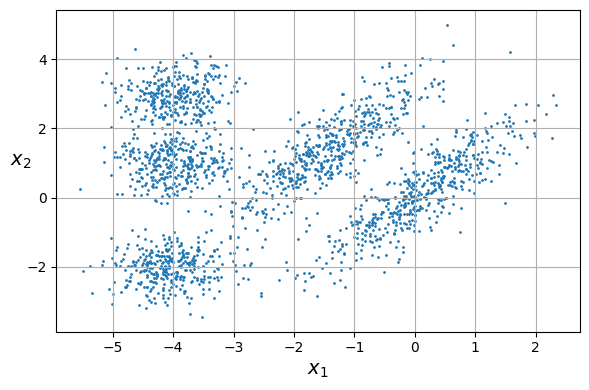

In [2]:
from sklearn.datasets import make_blobs

def plot_clusters(X, y=None, Mu_array=0):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    if sum(Mu_array) != 0:
        plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.grid()
    plt.tight_layout()
    plt.show()


if 0:
    blob_centers = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
    X, y = make_blobs(n_samples=2000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

if 1:
    # two off-diagonal blobs
    X1, _ = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
    X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
    # three spherical blobs
    blob_centers = np.array(
        [[ -4,  1],
         [-4 ,  3],
         [-4,  -2]])
    s = 0.5
    blob_std = np.array([s, s, s])
    X2, _ = make_blobs(n_samples=1000, centers=blob_centers,
                      cluster_std=blob_std, random_state=7)

    X = np.r_[X1, X2]
    K = 5

figure()
plot_clusters(X)

In [16]:
 #@title K-means++ to setup initial conditions
def euclidean_distance(x1, x2):
    return sqrt(sum((x1 - x2) ** 2))

# initialization for Kmeans++ algorithm
def initialize(X, K):

    ## Step 1: initialize the centroids list and add
    ## a randomly selected data point to the list
    n_samples, n_features = X.shape
    random_sample_idxs = random.choice(n_samples, 1, replace=False)
    centroids = X[random_sample_idxs,:]

    ## compute remaining K - 1 centroids
    for c_id in range(K - 1):
        ## Step 2: initialize a list to store distances of data
        ## points from nearest centroid
        ## compute distance of 'point' from each of the previously
        ## selected centroid and store the minimum distance
        dist = zeros(n_samples)
        for idx, sample in enumerate(X):
          distances     = [euclidean_distance(sample, point) for point in centroids]
          dist[idx]     = min(distances)

        ## Step 3: select data point with maximum distance as our next centroid
        next_centroid = X[argmax(dist), :]
        centroids=vstack([centroids,next_centroid])

    return centroids



centroids = initialize(X,5)

In [18]:
from scipy.stats import multivariate_normal


def initialize(X, K, centroids):
    # N has the number of rows while d has the number of columns of dataset X
    N, d = X.shape

    # initial weights given to each cluster are stored in phi or P(Zi=c)
    Pi = full(shape=K, fill_value=1/K)

    # initial weights given to each data point wrt to each cluster or P(Zi=c|Xi)
    weights = full(shape=(N,K), fill_value=1/K)


    # initial value of mean of K Gaussians
    Mu = [  centroids[i,:] for i in range(K) ]

    # initial value of covariance matrix of K Gaussians
    Sigma = [ cov(X.T) for _ in range(K) ]
    # theta =(Mu,Sigma,Pi)
    return Pi, Mu, Sigma, weights

# computer posterior probability of each data point wrt each cluster
# parameters are Pi, Mu, Sigma
def predict_posterior(X, K, Pi, Mu, Sigma):
    N = X.shape[0]
    # Creates a N*K matrix denoting probability of each point wrt each cluster
    likelihood = zeros( (N, K) )
    for i in range(K):
        distribution = multivariate_normal(mean=Mu[i],cov=Sigma[i])
            # pdf : probability denisty function
        likelihood[:,i] = distribution.pdf(X)

    numerator = likelihood * Pi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights


# E-Step: update weights holding Pi Mu Sigma constant
def e_step(X, K, Pi, Mu, Sigma):
    # updated weights(i,c)=P(Zi=c|Xi)
    weights   = predict_posterior(X, K, Pi, Mu, Sigma)
    return weights


# M-Step: update Mu, Sigma, Pi, holding weights constant
def m_step(X, K, weights):
    # mean of sum of probability of all data points wrt to one cluster is new updated probability of cluster Pi_c
    Pi_update = weights.mean(axis=0)
    Mu_update = [[] for _ in range(K)]
    Sigma_update = [[] for _ in range(K)]
    for i in range(K):
        weight_i = weights[:, [i]]
        total_weight = weight_i.sum()
        Mu_update[i]    = (X * weight_i).sum(axis=0) / total_weight
        Sigma_update[i] = cov(X.T, aweights=(weight_i/total_weight).flatten(), bias=True)

    return Pi_update, Mu_update, Sigma_update

# predict function
def predict(X, K, Pi, Mu, Sigma):
   weights = predict_posterior(X, K, Pi, Mu, Sigma)
   # datapoint belongs to cluster with maximum probability
   # returns this value
   return argmax(weights, axis=1)




In [14]:
def GMM_fit(X, K,centroids, max_iter=200, threshold =0.0001):
  # initialise parameters like weights, Pi, Mu, Sigma of all Gaussians in dataset X
  # step 1
  Pi, Mu, Sigma, weights = initialize(X,K,centroids)
  for j in range(max_iter):
    z = predict(X, K, Pi, Mu, Sigma)
    Mu_array = array(Mu)
    plot_clusters(X, z, Mu_array)
    # step 2 iterate to update the value of P(Zi=c|Xi)
    weights = e_step(X, K, Pi, Mu, Sigma)
    Pi_old  = Pi;
    Mu_old  = Mu;
    # step 3 iterate to update the value of Mu, Sigma and Pi as the clusters shift
    Pi, Mu, Sigma  = m_step(X, K, weights)

    # for stopping
    distances = [ norm(Mu[i] - Mu_old[i]) for i in range(K)]
    print(sum(distances))
    if sum(distances) < threshold:
      print('Number of iteration is ', j+1)
      break

  z = predict(X, K, Pi, Mu, Sigma)
  Mu_array = array(Mu)
  plot_clusters(X, z, Mu_array)

  return z, Pi, Mu, Sigma



In [19]:
z, Pi, Mu, Sigma=GMM_fit(X, 5,centroids)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# illustration of GMM applied to some points in the 2d plane. We see
# that the method induces a Voronoi tessellation of the points.
from mpl_toolkits.mplot3d import Axes3D

def plot_decision_boundaries( X, K, Pi, Mu, Sigma, resolution=200):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], K, Pi, Mu, Sigma)
    N = Z.shape[0]
    Z = Z.reshape(xx.shape)

    likelihood = zeros( (N, K) )
    for i in range(K):
        distribution = multivariate_normal(mean=Mu[i],cov=Sigma[i])
        likelihood[:,i] = distribution.pdf(np.c_[xx.ravel(), yy.ravel()])

    Z_prob = likelihood.dot(Pi)
    Z_prob = Z_prob.reshape(xx.shape)

    figure()
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plt.scatter(X[:, 0], X[:, 1], s=1)
    Mu_array = array(Mu)
    plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
    plt.show()

    figure()
    plt.contourf(xx, yy, Z_prob,
                 levels=np.logspace(-9, -0.5,7),cmap="Pastel2")
    plt.contour(xx, yy, Z_prob,
                levels=np.logspace(-9, -0.5, 7),
                linewidths=1, colors='k')
    plt.scatter(X[:, 0], X[:, 1], s=1)
    plt.scatter(Mu_array[:,0],Mu_array[:,1],marker="x", color="black", linewidth=2)
    plt.show()

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(xx, yy, Z_prob,
                              cmap=mpl.cm.coolwarm,
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_zlabel("$P(x_1,x_2)$", fontsize=14)




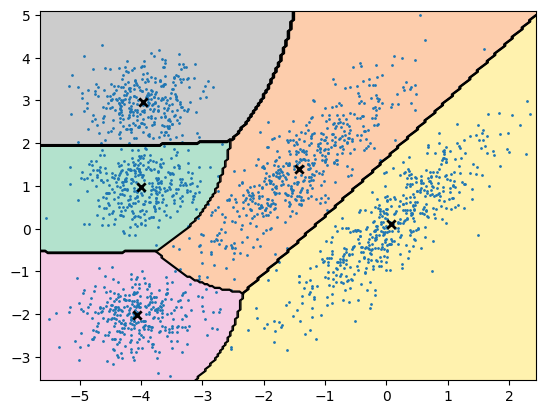

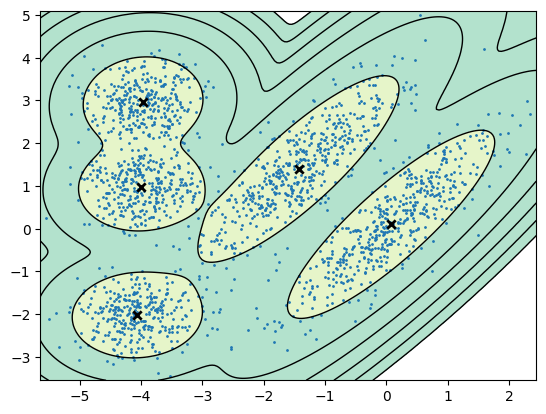

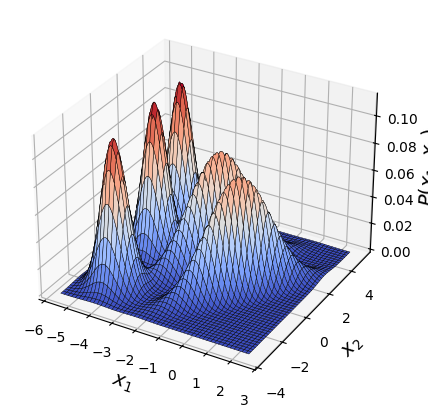

In [21]:
plot_decision_boundaries( X, 5, Pi, Mu, Sigma)

In [22]:
# this code calculate the neg-log-likelihood for K=5
N = X.shape[0]
likelihood = zeros( (N, K) )
for i in range(K):
    distribution = multivariate_normal(mean=Mu[i],cov=Sigma[i])
            # pdf : probability denisty function
    likelihood[:,i] = distribution.pdf(X)

neg_log_likelihood = -sum(log(likelihood.dot(Pi)))
print(neg_log_likelihood)

6574.215058142486
